In [1555]:
import pandas as pd
import numpy as np

In [1556]:
df = pd.read_csv("/Users/aimaldastagirzada/Downloads/train 2.csv", delimiter=';')

In [1557]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [1558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Part 1: Data Preprocessing

In [1559]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [1560]:
#Job has some missing values stored as unknown 
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [1561]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [1562]:
#Education has some missing vlaues stored as Unkown 
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [1563]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [1564]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [1565]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [1566]:
#Contact has some unknown values 
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [1567]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [1568]:
#Poutcome has unknown values
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

#### We will replace the unknown values to NAN 

In [1569]:
df['job'] = df['job'].replace('unknown', np.nan)
df['education'] =df['education'].replace('unknown', np.nan)
df['contact'] = df['contact'].replace('unknown', np.nan)
df['poutcome'] = df['poutcome'].replace('unknown', np.nan)


In [1570]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [1571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


 Missing values in 1) job  2)educaiton 3)contact 4)poutcome

In [1572]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,44923,45211,43354,45211,45211.000000,45211,45211,32191,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,8252,45211
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,4901,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


## Imputation for the Missing Values with three options
## Option 1: Imputig with missing values with 'Other' 
## Option 2: Imputing with missing values with Mode
## Option 3: Impute randomly 

In [1573]:
df_test=df.copy()

In [1574]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [1575]:
df_test.groupby('job').describe()

age                                                       
                count       mean        std   min   25%   50%   75%   max   
job                                                                         
admin.         5171.0  39.289886   9.365483  20.0  32.0  38.0  46.0  75.0  \
blue-collar    9732.0  40.044081   9.025888  20.0  33.0  39.0  47.0  75.0   
entrepreneur   1487.0  42.190989   9.114486  21.0  35.0  41.0  49.0  84.0   
housemaid      1240.0  46.415323  10.477275  22.0  38.0  47.0  55.0  83.0   
management     9458.0  40.449567   9.383415  21.0  33.0  38.0  48.0  81.0   
retired        2264.0  61.626767   9.535329  24.0  56.0  59.0  67.0  95.0   
self-employed  1579.0  40.484484   9.656075  22.0  33.0  39.0  48.0  76.0   
services       4154.0  38.740250   9.041371  20.0  32.0  37.0  46.0  69.0   
student         938.0  26.542644   4.842536  18.0  23.0  26.0  29.0  48.0   
technician     7597.0  39.314598   8.939944  21.0  32.0  37.0  46.0  71.0   
unemployed     1303.0  40.961627   9.777010  21.0  33.0  40.0  48.0  66.0   

              balance               ... pdays        previous             
                count         mean  ...   75%    max    count      mean   
job                                 ...                                   
admin.         5171.0  1135.838909  ...  -1.0  826.0   5171.0  0.671630  \
blue-collar    9732.0  1078.826654  ...  -1.0  838.0   9732.0  0.505138   
entrepreneur   1487.0  1521.470074  ...  -1.0  557.0   1487.0  0.478144   
housemaid      1240.0  1392.395161  ...  -1.0  842.0   1240.0  0.371774   
management     9458.0  1763.616832  ...  -1.0  854.0   9458.0  0.668006   
retired        2264.0  1984.215106  ...  -1.0  792.0   2264.0  0.638693   
self-employed  1579.0  1647.970868  ...  -1.0  585.0   1579.0  0.551615   
services       4154.0   997.088108  ...  -1.0  761.0   4154.0  0.501204   
student         938.0  1388.060768  ...  92.0  535.0    938.0  0.953092   
technician     7597.0  1252.632092  ...  -1.0  831.0   7597.0  0.574569   
unemployed     1303.0  1521.745971  ...  -1.0  871.0   1303.0  0.466616   

                                                    
                    std  min  25%  50%  75%    max  
job                                                 
admin.         2.014955  0.0  0.0  0.0  0.0   32.0  
blue-collar    1.853396  0.0  0.0  0.0  0.0   58.0  
entrepreneur   1.807164  0.0  0.0  0.0  0.0   37.0  
housemaid      1.382355  0.0  0.0  0.0  0.0   18.0  
management     3.522605  0.0  0.0  0.0  0.0  275.0  
retired        1.727894  0.0  0.0  0.0  0.0   20.0  
self-employed  1.713390  0.0  0.0  0.0  0.0   24.0  
services       1.620101  0.0  0.0  0.0  0.0   30.0  
student        2.386805  0.0  0.0  0.0  1.0   37.0  
technician     1.967449  0.0  0.0  0.0  0.0   55.0  
unemployed     1.537123  0.0  0.0  0.0  0.0   17.0  

[11 rows x 56 columns]

In [1576]:
df_test.groupby('education').describe()

age                                                       
             count       mean        std   min   25%   50%   75%   max   
education                                                                
primary     6851.0  45.865567  11.401980  18.0  37.0  45.0  54.0  95.0  \
secondary  23202.0  39.964270  10.159568  18.0  32.0  38.0  47.0  95.0   
tertiary   13301.0  39.593640   9.887923  20.0  32.0  37.0  46.0  89.0   

           balance               ... pdays        previous             
             count         mean  ...   75%    max    count      mean   
education                        ...                                   
primary     6851.0  1250.949934  ...  -1.0  791.0   6851.0  0.489272  \
secondary  23202.0  1154.880786  ...  -1.0  842.0  23202.0  0.567753   
tertiary   13301.0  1758.416435  ...  -1.0  871.0  13301.0  0.661980   

                                                
                std  min  25%  50%  75%    max  
education                                       
primary    1.897365  0.0  0.0  0.0  0.0   58.0  
secondary  1.849867  0.0  0.0  0.0  0.0   55.0  
tertiary   3.139468  0.0  0.0  0.0  0.0  275.0  

[3 rows x 56 columns]

In [1577]:
df_test.groupby('contact').describe()

age                                                       
             count       mean        std   min   25%   50%   75%   max   
contact                                                                  
cellular   29285.0  40.400785  10.494896  18.0  32.0  38.0  48.0  94.0  \
telephone   2906.0  47.837922  13.934969  18.0  37.0  47.0  57.0  95.0   

           balance               ... pdays        previous             
             count         mean  ...   75%    max    count      mean   
contact                          ...                                   
cellular   29285.0  1397.926993  ...  51.0  871.0  29285.0  0.804064  \
telephone   2906.0  1803.704061  ...  -1.0  690.0   2906.0  0.827254   

                                                
                std  min  25%  50%  75%    max  
contact                                         
cellular   2.695072  0.0  0.0  0.0  1.0  275.0  
telephone  2.501998  0.0  0.0  0.0  0.0   37.0  

[2 rows x 56 columns]

In [1578]:
df_test.groupby('poutcome').describe()

age                                                     balance   
           count       mean        std   min   25%   50%   75%   max   count   
poutcome                                                                       
failure   4901.0  40.786166  10.429079  19.0  33.0  38.0  47.0  88.0  4901.0  \
other     1840.0  39.752174  11.091370  18.0  32.0  37.0  46.0  89.0  1840.0   
success   1511.0  42.964924  14.301418  18.0  32.0  39.0  53.0  93.0  1511.0   

                       ...  pdays        previous                            
                 mean  ...    75%    max    count      mean       std  min   
poutcome               ...                                                   
failure   1465.805550  ...  339.0  871.0   4901.0  2.896552  3.130252  1.0  \
other     1487.411413  ...  335.0  838.0   1840.0  4.009239  7.799166  1.0   
success   1939.301125  ...  187.0  771.0   1511.0  3.075447  2.593854  1.0   

                                
          25%  50%  75%    max  
poutcome                        
failure   1.0  2.0  3.0   55.0  
other     1.0  2.0  4.0  275.0  
success   1.0  2.0  4.0   28.0  

[3 rows x 56 columns]

# Option 1

In [1579]:
df_test['job']=df_test['job'].fillna('Other')
df_test['education'] = df_test['education'].fillna('Other')
df_test['contact'] = df_test['contact'].fillna('Other')
df_test['poutcome']=df_test['poutcome'].fillna('Other')


In [1580]:
df_test.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,Other,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [1581]:
df_test.groupby('job').describe()

age                                                       
                count       mean        std   min   25%   50%   75%   max   
job                                                                         
Other           288.0  47.593750  10.775095  25.0  41.0  47.0  55.0  82.0  \
admin.         5171.0  39.289886   9.365483  20.0  32.0  38.0  46.0  75.0   
blue-collar    9732.0  40.044081   9.025888  20.0  33.0  39.0  47.0  75.0   
entrepreneur   1487.0  42.190989   9.114486  21.0  35.0  41.0  49.0  84.0   
housemaid      1240.0  46.415323  10.477275  22.0  38.0  47.0  55.0  83.0   
management     9458.0  40.449567   9.383415  21.0  33.0  38.0  48.0  81.0   
retired        2264.0  61.626767   9.535329  24.0  56.0  59.0  67.0  95.0   
self-employed  1579.0  40.484484   9.656075  22.0  33.0  39.0  48.0  76.0   
services       4154.0  38.740250   9.041371  20.0  32.0  37.0  46.0  69.0   
student         938.0  26.542644   4.842536  18.0  23.0  26.0  29.0  48.0   
technician     7597.0  39.314598   8.939944  21.0  32.0  37.0  46.0  71.0   
unemployed     1303.0  40.961627   9.777010  21.0  33.0  40.0  48.0  66.0   

              balance               ... pdays        previous             
                count         mean  ...   75%    max    count      mean   
job                                 ...                                   
Other           288.0  1772.357639  ...  -1.0  683.0    288.0  0.319444  \
admin.         5171.0  1135.838909  ...  -1.0  826.0   5171.0  0.671630   
blue-collar    9732.0  1078.826654  ...  -1.0  838.0   9732.0  0.505138   
entrepreneur   1487.0  1521.470074  ...  -1.0  557.0   1487.0  0.478144   
housemaid      1240.0  1392.395161  ...  -1.0  842.0   1240.0  0.371774   
management     9458.0  1763.616832  ...  -1.0  854.0   9458.0  0.668006   
retired        2264.0  1984.215106  ...  -1.0  792.0   2264.0  0.638693   
self-employed  1579.0  1647.970868  ...  -1.0  585.0   1579.0  0.551615   
services       4154.0   997.088108  ...  -1.0  761.0   4154.0  0.501204   
student         938.0  1388.060768  ...  92.0  535.0    938.0  0.953092   
technician     7597.0  1252.632092  ...  -1.0  831.0   7597.0  0.574569   
unemployed     1303.0  1521.745971  ...  -1.0  871.0   1303.0  0.466616   

                                                    
                    std  min  25%  50%  75%    max  
job                                                 
Other          1.089403  0.0  0.0  0.0  0.0    7.0  
admin.         2.014955  0.0  0.0  0.0  0.0   32.0  
blue-collar    1.853396  0.0  0.0  0.0  0.0   58.0  
entrepreneur   1.807164  0.0  0.0  0.0  0.0   37.0  
housemaid      1.382355  0.0  0.0  0.0  0.0   18.0  
management     3.522605  0.0  0.0  0.0  0.0  275.0  
retired        1.727894  0.0  0.0  0.0  0.0   20.0  
self-employed  1.713390  0.0  0.0  0.0  0.0   24.0  
services       1.620101  0.0  0.0  0.0  0.0   30.0  
student        2.386805  0.0  0.0  0.0  1.0   37.0  
technician     1.967449  0.0  0.0  0.0  0.0   55.0  
unemployed     1.537123  0.0  0.0  0.0  0.0   17.0  

[12 rows x 56 columns]

In [1582]:

df_test.groupby('education').describe()

age                                                       
             count       mean        std   min   25%   50%   75%   max   
education                                                                
Other       1857.0  44.510501  12.196400  18.0  36.0  45.0  53.0  93.0  \
primary     6851.0  45.865567  11.401980  18.0  37.0  45.0  54.0  95.0   
secondary  23202.0  39.964270  10.159568  18.0  32.0  38.0  47.0  95.0   
tertiary   13301.0  39.593640   9.887923  20.0  32.0  37.0  46.0  89.0   

           balance               ... pdays        previous             
             count         mean  ...   75%    max    count      mean   
education                        ...                                   
Other       1857.0  1526.754443  ...  -1.0  687.0   1857.0  0.488422  \
primary     6851.0  1250.949934  ...  -1.0  791.0   6851.0  0.489272   
secondary  23202.0  1154.880786  ...  -1.0  842.0  23202.0  0.567753   
tertiary   13301.0  1758.416435  ...  -1.0  871.0  13301.0  0.661980   

                                                
                std  min  25%  50%  75%    max  
education                                       
Other      1.569167  0.0  0.0  0.0  0.0   27.0  
primary    1.897365  0.0  0.0  0.0  0.0   58.0  
secondary  1.849867  0.0  0.0  0.0  0.0   55.0  
tertiary   3.139468  0.0  0.0  0.0  0.0  275.0  

[4 rows x 56 columns]

In [1583]:
df_test.groupby('contact').describe()

age                                                       
             count       mean        std   min   25%   50%   75%   max   
contact                                                                  
Other      13020.0  40.600077   9.439221  20.0  33.0  39.0  48.0  61.0  \
cellular   29285.0  40.400785  10.494896  18.0  32.0  38.0  48.0  94.0   
telephone   2906.0  47.837922  13.934969  18.0  37.0  47.0  57.0  95.0   

           balance               ... pdays        previous             
             count         mean  ...   75%    max    count      mean   
contact                          ...                                   
Other      13020.0  1183.550384  ...  -1.0  850.0  13020.0  0.021966  \
cellular   29285.0  1397.926993  ...  51.0  871.0  29285.0  0.804064   
telephone   2906.0  1803.704061  ...  -1.0  690.0   2906.0  0.827254   

                                                
                std  min  25%  50%  75%    max  
contact                                         
Other      0.502526  0.0  0.0  0.0  0.0   41.0  
cellular   2.695072  0.0  0.0  0.0  1.0  275.0  
telephone  2.501998  0.0  0.0  0.0  0.0   37.0  

[3 rows x 56 columns]

In [1584]:
df_test.groupby('poutcome').describe()

age                                                       
            count       mean        std   min   25%   50%   75%   max   
poutcome                                                                
Other     36959.0  40.932114  10.430504  18.0  33.0  39.0  49.0  95.0  \
failure    4901.0  40.786166  10.429079  19.0  33.0  38.0  47.0  88.0   
other      1840.0  39.752174  11.091370  18.0  32.0  37.0  46.0  89.0   
success    1511.0  42.964924  14.301418  18.0  32.0  39.0  53.0  93.0   

          balance               ...  pdays        previous             
            count         mean  ...    75%    max    count      mean   
poutcome                        ...                                    
Other     36959.0  1318.722043  ...   -1.0  528.0  36959.0  0.000460  \
failure    4901.0  1465.805550  ...  339.0  871.0   4901.0  2.896552   
other      1840.0  1487.411413  ...  335.0  838.0   1840.0  4.009239   
success    1511.0  1939.301125  ...  187.0  771.0   1511.0  3.075447   

                                               
               std  min  25%  50%  75%    max  
poutcome                                       
Other     0.047388  0.0  0.0  0.0  0.0    7.0  
failure   3.130252  1.0  1.0  2.0  3.0   55.0  
other     7.799166  1.0  1.0  2.0  4.0  275.0  
success   2.593854  1.0  1.0  2.0  4.0   28.0  

[4 rows x 56 columns]

In [1585]:
df_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [1586]:
summary = df_test[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome']].describe()
print(summary)

                age        balance           day      duration      campaign   
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000  \
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

## Option 2 

In [1587]:
df_test_2=df.copy()

In [1588]:
df_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [1589]:
df_test_2.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,44923,45211,43354,45211,45211.000000,45211,45211,32191,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,8252,45211
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,4901,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [1590]:
df_test_2['job']=df['job'].fillna('blue-collar')
df_test_2['education']=df['education'].fillna('secondary')
df_test_2['contact']=df['contact'].fillna('cellular')
df_test_2['poutcome']=df['poutcome'].fillna('failure')


In [1591]:
df_test_2.groupby('job').describe()

age                                                       
                 count       mean        std   min   25%   50%   75%   max   
job                                                                          
admin.          5171.0  39.289886   9.365483  20.0  32.0  38.0  46.0  75.0  \
blue-collar    10020.0  40.261078   9.167444  20.0  33.0  39.0  47.0  82.0   
entrepreneur    1487.0  42.190989   9.114486  21.0  35.0  41.0  49.0  84.0   
housemaid       1240.0  46.415323  10.477275  22.0  38.0  47.0  55.0  83.0   
management      9458.0  40.449567   9.383415  21.0  33.0  38.0  48.0  81.0   
retired         2264.0  61.626767   9.535329  24.0  56.0  59.0  67.0  95.0   
self-employed   1579.0  40.484484   9.656075  22.0  33.0  39.0  48.0  76.0   
services        4154.0  38.740250   9.041371  20.0  32.0  37.0  46.0  69.0   
student          938.0  26.542644   4.842536  18.0  23.0  26.0  29.0  48.0   
technician      7597.0  39.314598   8.939944  21.0  32.0  37.0  46.0  71.0   
unemployed      1303.0  40.961627   9.777010  21.0  33.0  40.0  48.0  66.0   

               balance               ... pdays        previous             
                 count         mean  ...   75%    max    count      mean   
job                                  ...                                   
admin.          5171.0  1135.838909  ...  -1.0  826.0   5171.0  0.671630  \
blue-collar    10020.0  1098.760479  ...  -1.0  838.0  10020.0  0.499800   
entrepreneur    1487.0  1521.470074  ...  -1.0  557.0   1487.0  0.478144   
housemaid       1240.0  1392.395161  ...  -1.0  842.0   1240.0  0.371774   
management      9458.0  1763.616832  ...  -1.0  854.0   9458.0  0.668006   
retired         2264.0  1984.215106  ...  -1.0  792.0   2264.0  0.638693   
self-employed   1579.0  1647.970868  ...  -1.0  585.0   1579.0  0.551615   
services        4154.0   997.088108  ...  -1.0  761.0   4154.0  0.501204   
student          938.0  1388.060768  ...  92.0  535.0    938.0  0.953092   
technician      7597.0  1252.632092  ...  -1.0  831.0   7597.0  0.574569   
unemployed      1303.0  1521.745971  ...  -1.0  871.0   1303.0  0.466616   

                                                    
                    std  min  25%  50%  75%    max  
job                                                 
admin.         2.014955  0.0  0.0  0.0  0.0   32.0  
blue-collar    1.836109  0.0  0.0  0.0  0.0   58.0  
entrepreneur   1.807164  0.0  0.0  0.0  0.0   37.0  
housemaid      1.382355  0.0  0.0  0.0  0.0   18.0  
management     3.522605  0.0  0.0  0.0  0.0  275.0  
retired        1.727894  0.0  0.0  0.0  0.0   20.0  
self-employed  1.713390  0.0  0.0  0.0  0.0   24.0  
services       1.620101  0.0  0.0  0.0  0.0   30.0  
student        2.386805  0.0  0.0  0.0  1.0   37.0  
technician     1.967449  0.0  0.0  0.0  0.0   55.0  
unemployed     1.537123  0.0  0.0  0.0  0.0   17.0  

[11 rows x 56 columns]

In [1592]:
df_test_2.groupby('education').describe()

age                                                       
             count       mean        std   min   25%   50%   75%   max   
education                                                                
primary     6851.0  45.865567  11.401980  18.0  37.0  45.0  54.0  95.0  \
secondary  25059.0  40.301169  10.392478  18.0  32.0  39.0  47.0  95.0   
tertiary   13301.0  39.593640   9.887923  20.0  32.0  37.0  46.0  89.0   

           balance               ... pdays        previous             
             count         mean  ...   75%    max    count      mean   
education                        ...                                   
primary     6851.0  1250.949934  ...  -1.0  791.0   6851.0  0.489272  \
secondary  25059.0  1182.438525  ...  -1.0  842.0  25059.0  0.561874   
tertiary   13301.0  1758.416435  ...  -1.0  871.0  13301.0  0.661980   

                                                
                std  min  25%  50%  75%    max  
education                                       
primary    1.897365  0.0  0.0  0.0  0.0   58.0  
secondary  1.830633  0.0  0.0  0.0  0.0   55.0  
tertiary   3.139468  0.0  0.0  0.0  0.0  275.0  

[3 rows x 56 columns]

In [1593]:
df_test_2.groupby('contact').describe()

age                                                       
             count       mean        std   min   25%   50%   75%   max   
contact                                                                  
cellular   42305.0  40.462120  10.181967  18.0  32.0  39.0  48.0  94.0  \
telephone   2906.0  47.837922  13.934969  18.0  37.0  47.0  57.0  95.0   

           balance               ... pdays        previous             
             count         mean  ...   75%    max    count      mean   
contact                          ...                                   
cellular   42305.0  1331.949368  ...  -1.0  871.0  42305.0  0.563361  \
telephone   2906.0  1803.704061  ...  -1.0  690.0   2906.0  0.827254   

                                                
                std  min  25%  50%  75%    max  
contact                                         
cellular   2.288224  0.0  0.0  0.0  0.0  275.0  
telephone  2.501998  0.0  0.0  0.0  0.0   37.0  

[2 rows x 56 columns]

In [1594]:
df_test_2.groupby('poutcome').describe()

age                                                       
            count       mean        std   min   25%   50%   75%   max   
poutcome                                                                
failure   41860.0  40.915026  10.430318  18.0  33.0  39.0  48.0  95.0  \
other      1840.0  39.752174  11.091370  18.0  32.0  37.0  46.0  89.0   
success    1511.0  42.964924  14.301418  18.0  32.0  39.0  53.0  93.0   

          balance               ...  pdays        previous             
            count         mean  ...    75%    max    count      mean   
poutcome                        ...                                    
failure   41860.0  1335.942690  ...   -1.0  871.0  41860.0  0.339537  \
other      1840.0  1487.411413  ...  335.0  838.0   1840.0  4.009239   
success    1511.0  1939.301125  ...  187.0  771.0   1511.0  3.075447   

                                               
               std  min  25%  50%  75%    max  
poutcome                                       
failure   1.419871  0.0  0.0  0.0  0.0   55.0  
other     7.799166  1.0  1.0  2.0  4.0  275.0  
success   2.593854  1.0  1.0  2.0  4.0   28.0  

[3 rows x 56 columns]

## Option 3

In [1595]:
df_test_3 =df.copy()


In [1596]:
df_test_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [1597]:
df['job'].unique() 

array(['management', 'technician', 'entrepreneur', 'blue-collar', nan,
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [1598]:
df['poutcome'].unique()

array([nan, 'failure', 'other', 'success'], dtype=object)

In [1599]:

poutcomes = df['poutcome'].unique()

In [1600]:
poutcomes = poutcomes[1:]

In [1601]:
df_test_3 = df.copy()

In [1602]:
missing = df['poutcome'].isnull().sum()
missing


36959

In [1603]:
random =np.random.choice(poutcomes, size= missing)
random

array(['failure', 'failure', 'success', ..., 'success', 'other', 'other'],
      dtype=object)

In [1604]:
df.loc[df['poutcome'].isnull(),'poutcome'] = random

In [1605]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,44923,45211,43354,45211,45211.000000,45211,45211,32191,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,17197,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [1606]:
df_test_3.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,44923,45211,43354,45211,45211.000000,45211,45211,32191,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,8252,45211
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,4901,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [1607]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [1608]:
#Contacts missing values randomly assigned 
df['contact'].unique()
contacts = df['contact'].unique()
contacts = contacts[1:]
missing_con = df['contact'].isnull().sum()
missing_con



13020

In [1609]:
random_con =np.random.choice(contacts, size= missing_con)
random_con

array(['telephone', 'telephone', 'cellular', ..., 'cellular', 'telephone',
       'cellular'], dtype=object)

In [1610]:
df.loc[df['contact'].isnull(),'contact'] = random_con

In [1611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [1612]:
df['education'].unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [1613]:
#Education column
random_values = np.random.choice(df['education'].dropna(), size=len(df[df['education'].isnull()]))
df.loc[df['education'].isnull(), 'education'] = random_values


In [1614]:
random_values_job = np.random.choice(df['job'].dropna(), size=len(df[df['job'].isnull()]))
df.loc[df['job'].isnull(), 'job'] = random_values_job


In [1615]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,9803,27214,24216,44396,NaN,25130,37967,35756,NaN,13766,NaN,NaN,NaN,NaN,17197,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


# Result from above: 
After implementing all three methods and analyzing the changes they were making to our dataset, we noticed a bias emerging as the mean, standard deviation, and other metrics shifted within our data. To ensure data integrity and prevent bias, we chose option 3, where we randomly assigned values to the missing data points within our dataset. This approach helped us maintain data integrity without introducing bias into our data.



# Data Cleaning: Outlier Analysis 

In [1616]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [1617]:
numerical_column = ['age', 'balance', 'day', 'campaign' , 'duration', 'pdays', 'previous']

In [1618]:
from scipy.stats import skew, kurtosis

In [1619]:
for column in numerical_column:
    skewness_values = []
    s = skew(df[column])
    k = kurtosis(df[column])
    print(f'{column}: skewness = {s}, kurtosis = {k}')

age: skewness = 0.6847952047866451, kurtosis = 0.31940232676995794
balance: skewness = 8.360030947252687, kurtosis = 140.73584832577242
day: skewness = 0.09307592583897241, kurtosis = -1.0599128678304488
campaign: skewness = 4.898487638410557, kurtosis = 39.24517750942221
duration: skewness = 3.1442137770103913, kurtosis = 18.151774935186822
pdays: skewness = 2.615628689259389, kurtosis = 6.934295545084991
previous: skewness = 41.84506608797322, kurtosis = 4506.362117674052


In [1620]:
#based on skewness and kurtosis, we use z score to remove outliers

if abs(s) > 1:
    df[column] = df[column].apply(lambda x: np.log(x + 1))

In [1621]:
from scipy.stats import zscore


In [1622]:
z_scores = zscore(df[numerical_column])

In [1623]:
threshold = 4

In [1624]:
df = df[(np.abs(z_scores) < threshold).all(axis=1)]

In [1625]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43277 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43277 non-null  int64  
 1   job        43277 non-null  object 
 2   marital    43277 non-null  object 
 3   education  43277 non-null  object 
 4   default    43277 non-null  object 
 5   balance    43277 non-null  int64  
 6   housing    43277 non-null  object 
 7   loan       43277 non-null  object 
 8   contact    43277 non-null  object 
 9   day        43277 non-null  int64  
 10  month      43277 non-null  object 
 11  duration   43277 non-null  int64  
 12  campaign   43277 non-null  int64  
 13  pdays      43277 non-null  int64  
 14  previous   43277 non-null  float64
 15  poutcome   43277 non-null  object 
 16  y          43277 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


In [1626]:
# Check Skew and Kurtosis after removing outliers
for column in numerical_column:
    skewness_values = []
    s = skew(df[column])
    k = kurtosis(df[column])
    print(f'{column}: skewness = {s}, kurtosis = {k}')

age: skewness = 0.6335201903234831, kurtosis = 0.09600627008153717
balance: skewness = 2.816295338887317, kurtosis = 9.639771168647258
day: skewness = 0.10164598418940281, kurtosis = -1.0563775946918421
campaign: skewness = 2.448590129604185, kurtosis = 7.5137918778700765
duration: skewness = 1.8923254695242766, kurtosis = 4.080093576269663
pdays: skewness = 2.4283616242576898, kurtosis = 4.692164087465832
previous: skewness = 2.3298969402932674, kurtosis = 4.453614229468947


# EDA

In [1627]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

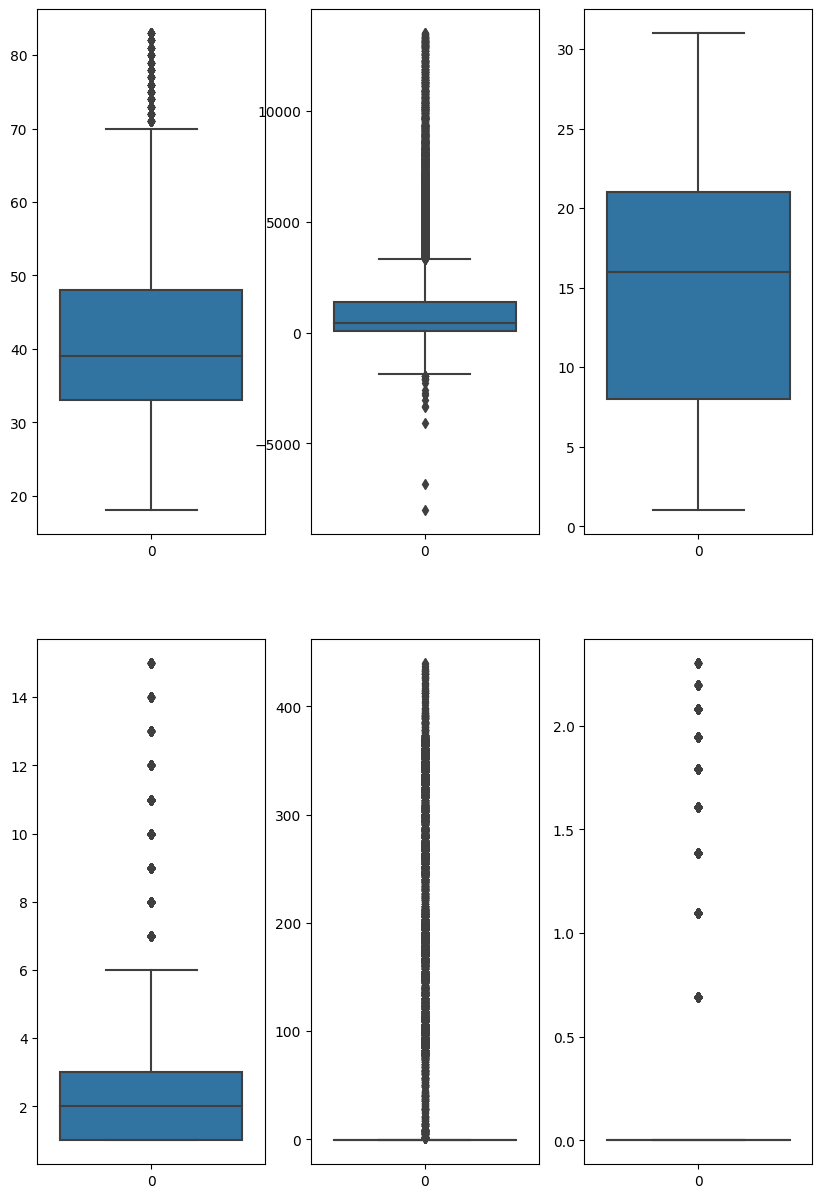

In [1628]:
fig, axs = plt.subplots(2, 3, figsize=(10, 15))

sns.boxplot(df['age'], ax=axs[0, 0])  
sns.boxplot(df['balance'], ax=axs[0, 1])  
sns.boxplot(df['day'], ax=axs[0, 2])
sns.boxplot(df['campaign'], ax=axs[1, 0]) 
sns.boxplot(df['pdays'], ax=axs[1, 1])  
sns.boxplot(df['previous'], ax=axs[1, 2])  

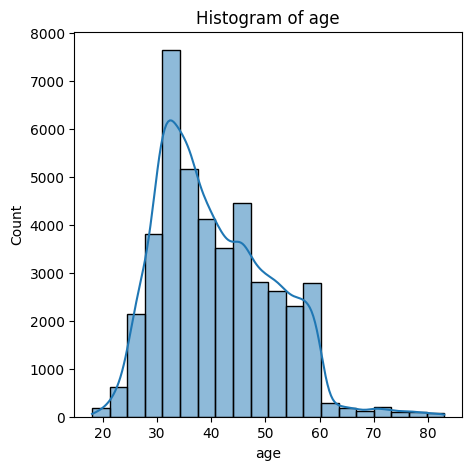

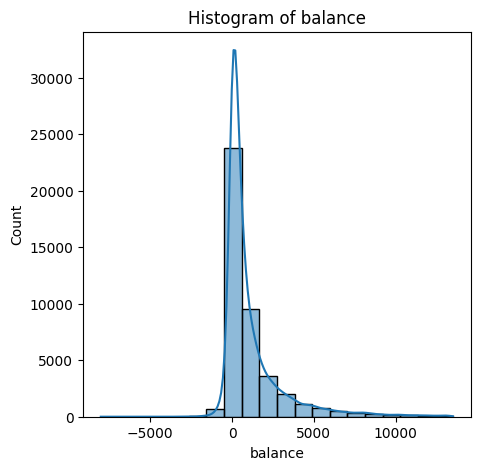

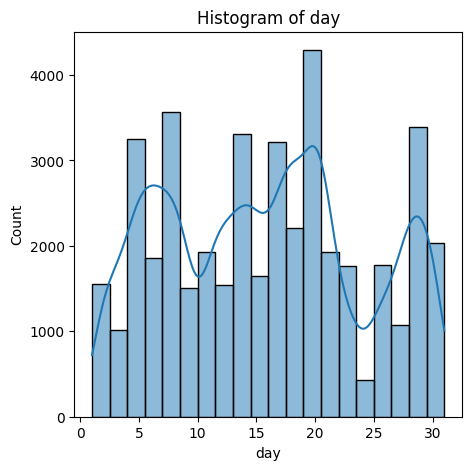

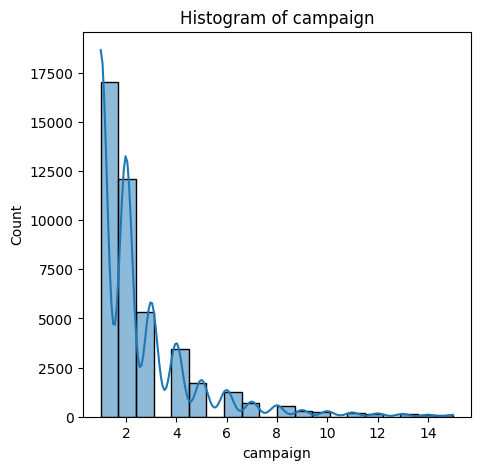

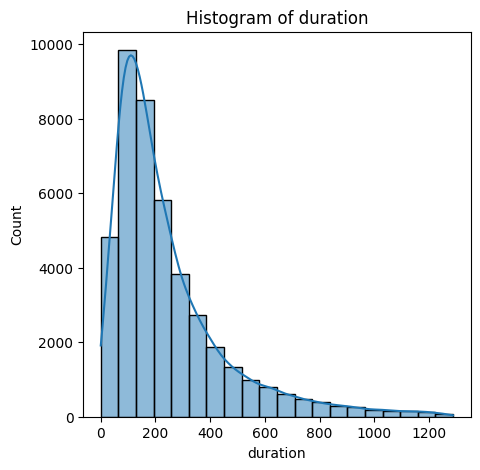

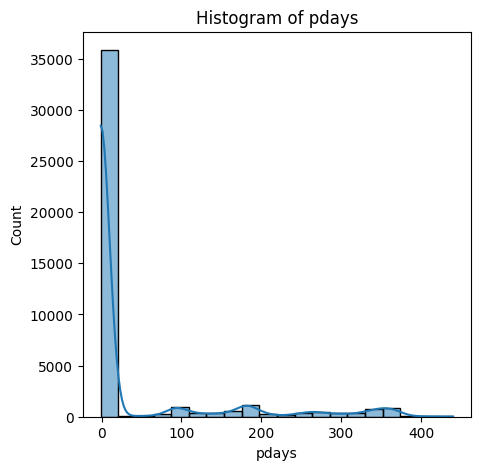

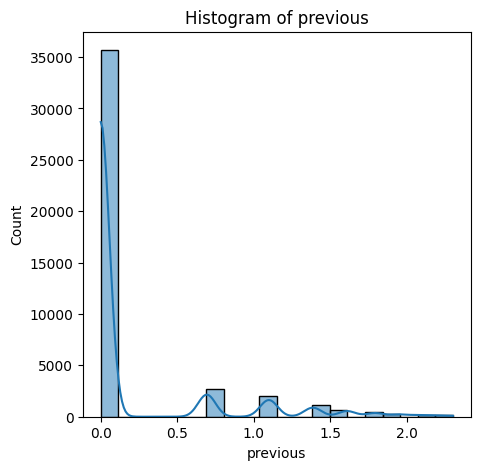

In [1629]:
for column in numerical_column:
    plt.figure(figsize=(5, 5)) 
    sns.histplot(df[column], bins=20, kde=True) 
    plt.title(f'Histogram of {column}') 
    plt.show()

Based on the histogram displayed above, it appears that there is variability in the data distribution. Specifically, the variables age, day, and balance exhibit significant variability, suggesting that they could serve as strong predictors in our analysis.

In [1630]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43277 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43277 non-null  int64  
 1   job        43277 non-null  object 
 2   marital    43277 non-null  object 
 3   education  43277 non-null  object 
 4   default    43277 non-null  object 
 5   balance    43277 non-null  int64  
 6   housing    43277 non-null  object 
 7   loan       43277 non-null  object 
 8   contact    43277 non-null  object 
 9   day        43277 non-null  int64  
 10  month      43277 non-null  object 
 11  duration   43277 non-null  int64  
 12  campaign   43277 non-null  int64  
 13  pdays      43277 non-null  int64  
 14  previous   43277 non-null  float64
 15  poutcome   43277 non-null  object 
 16  y          43277 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 7.0+ MB


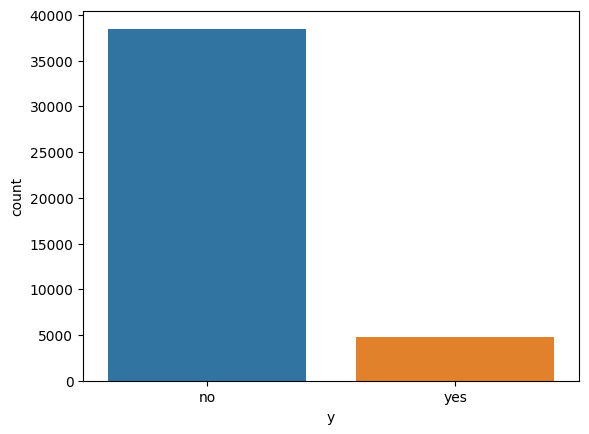

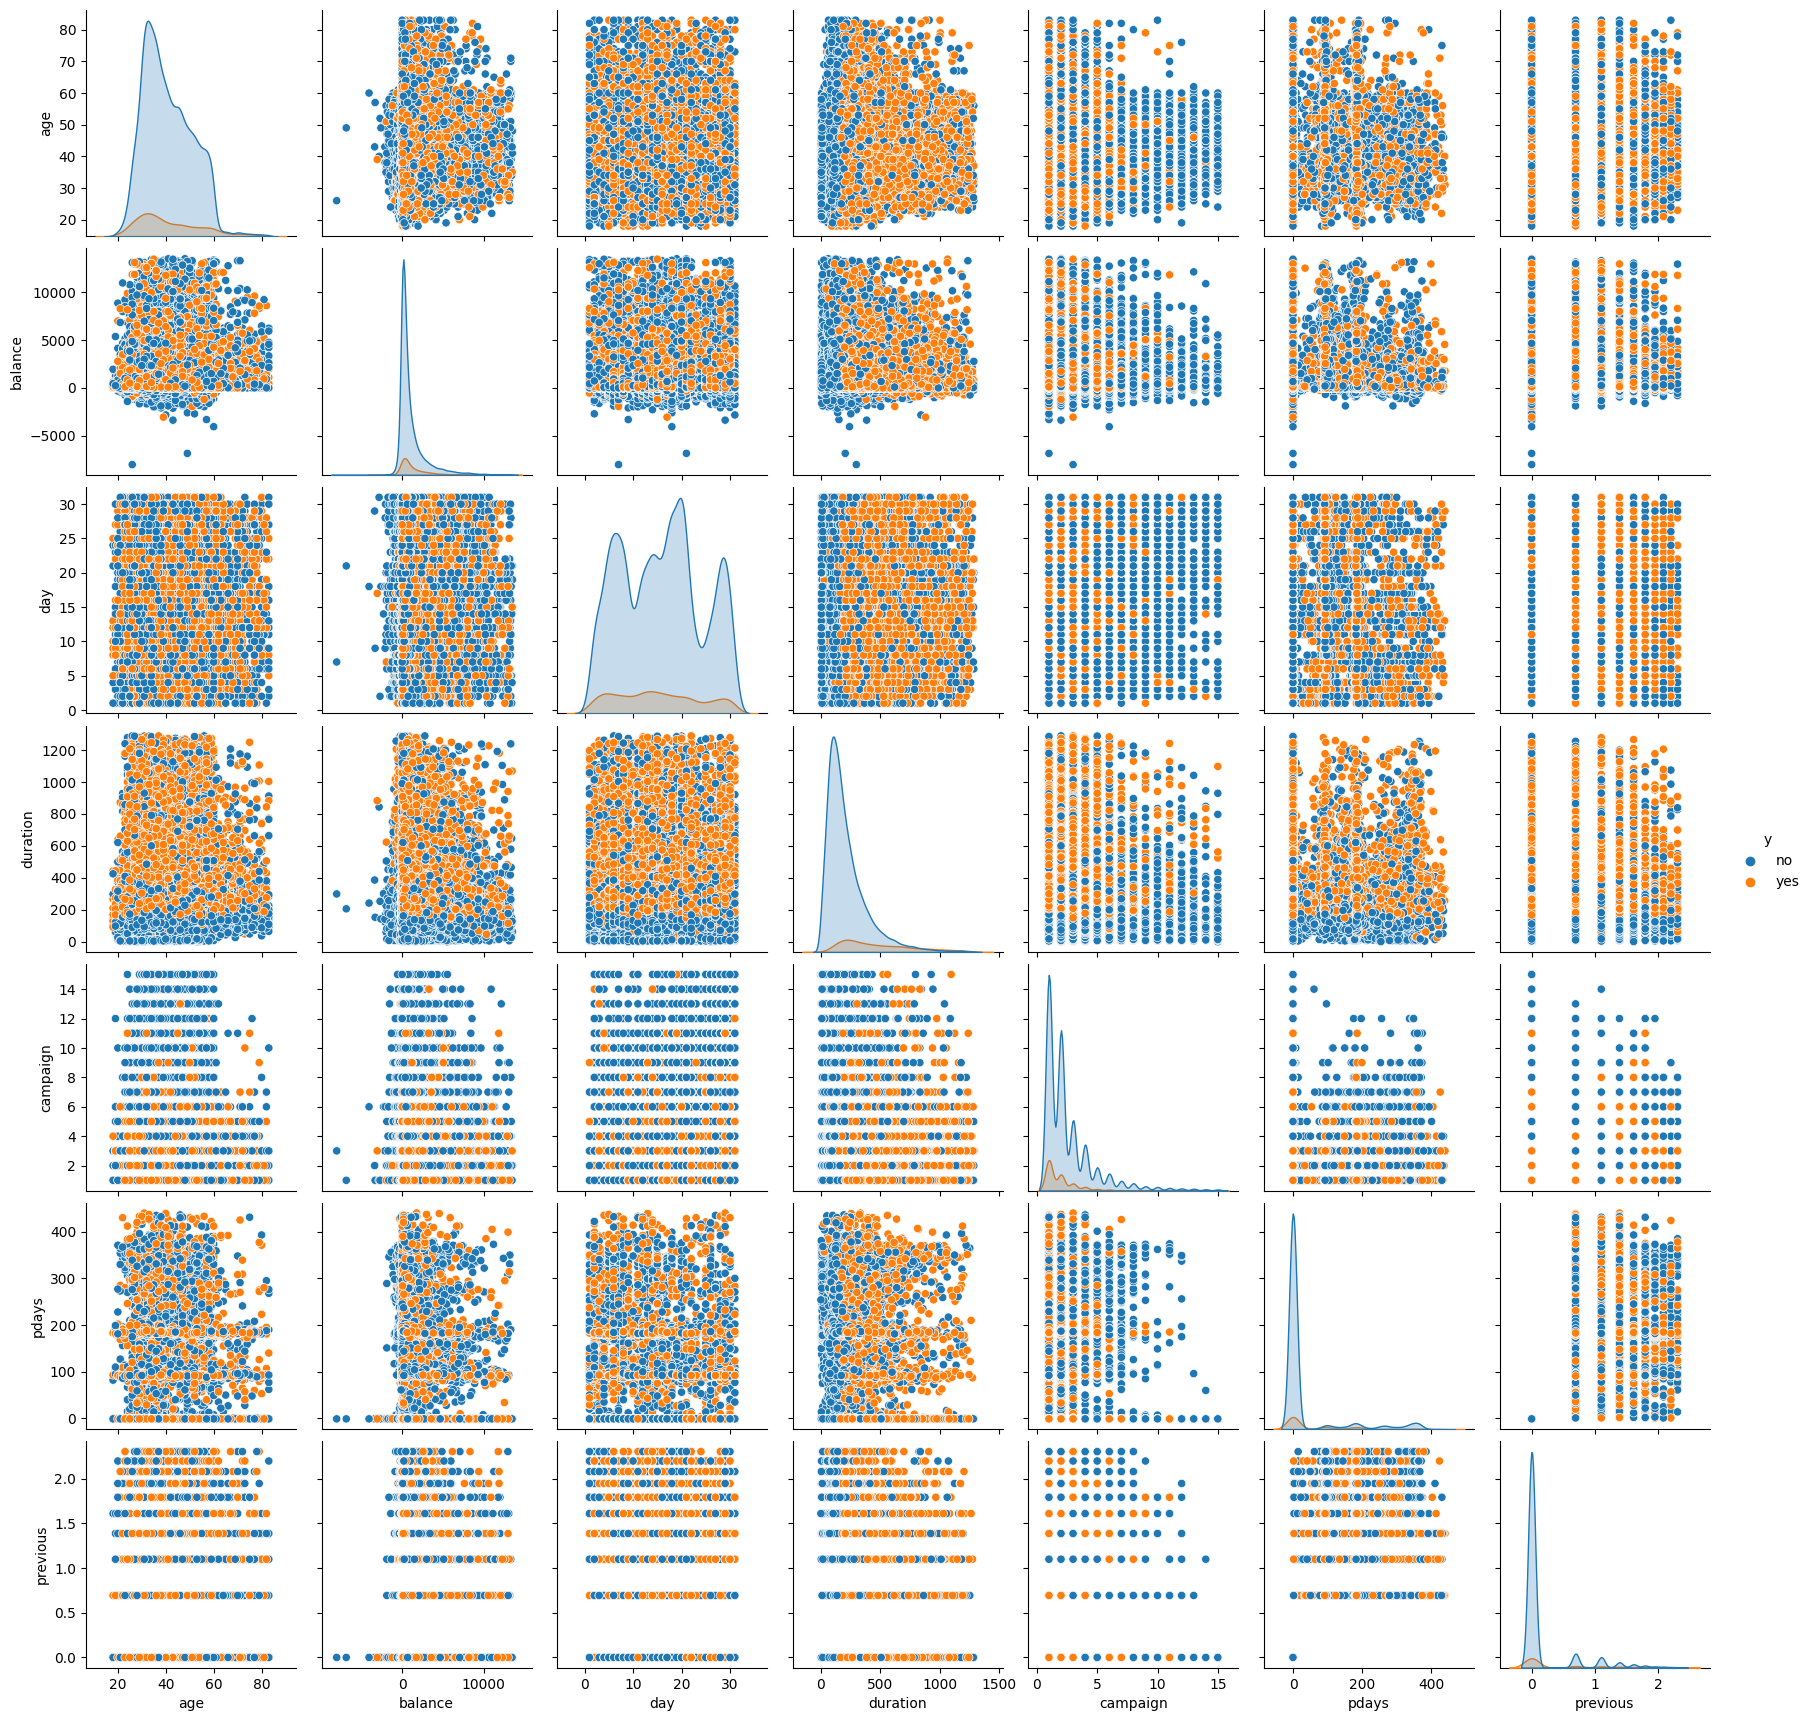

In [1631]:
sns.countplot(x='y', data=df)
plt.show()

# More detailed exploration
sns.pairplot(df, hue='y')
plt.show()

In [1632]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<Axes: xlabel='pdays', ylabel='Count'>

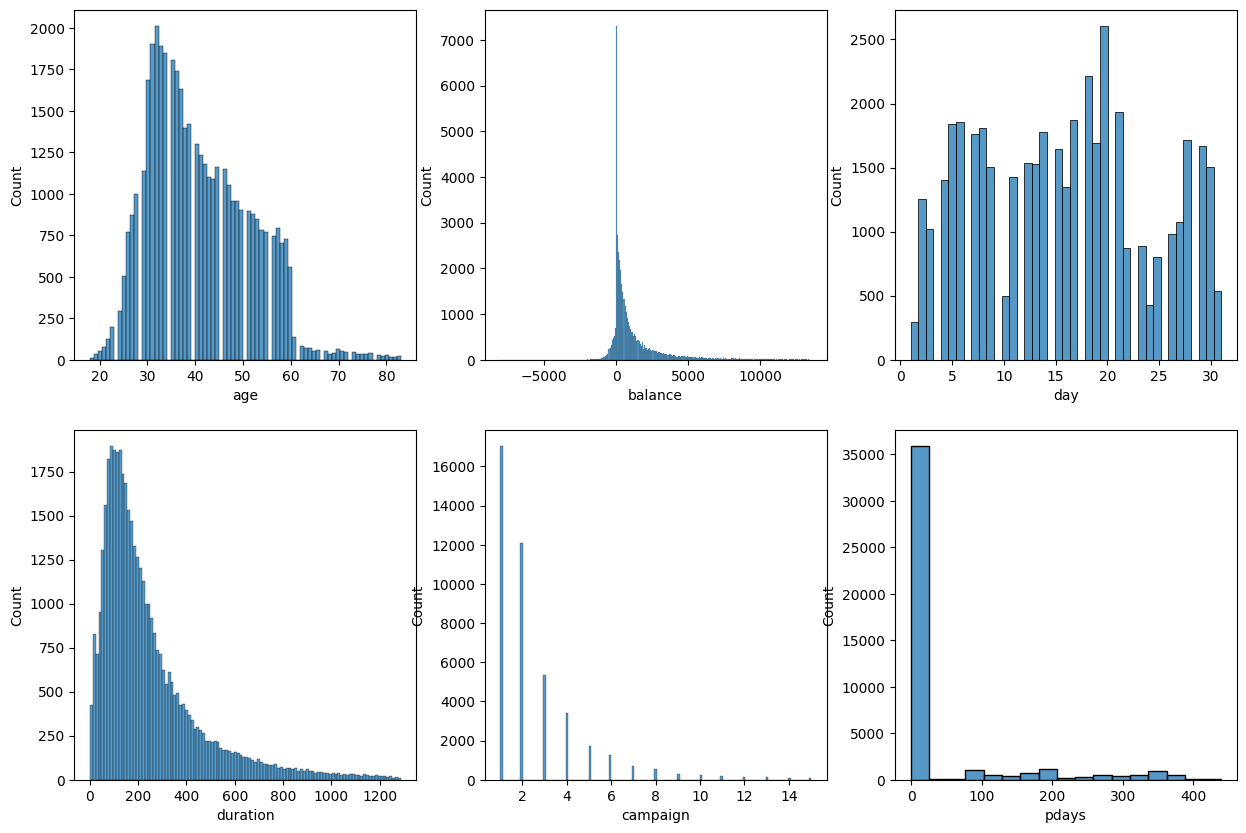

In [1633]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
sns.histplot(df['age'], ax=axs[0][0])
sns.histplot(df['balance'], ax=axs[0][1])
sns.histplot(df['day'], ax=axs[0][2])
sns.histplot(df['duration'], ax=axs[1][0])
sns.histplot(df['campaign'], ax=axs[1][1])
sns.histplot(df['pdays'], ax=axs[1][2])


<Axes: xlabel='y', ylabel='pdays'>

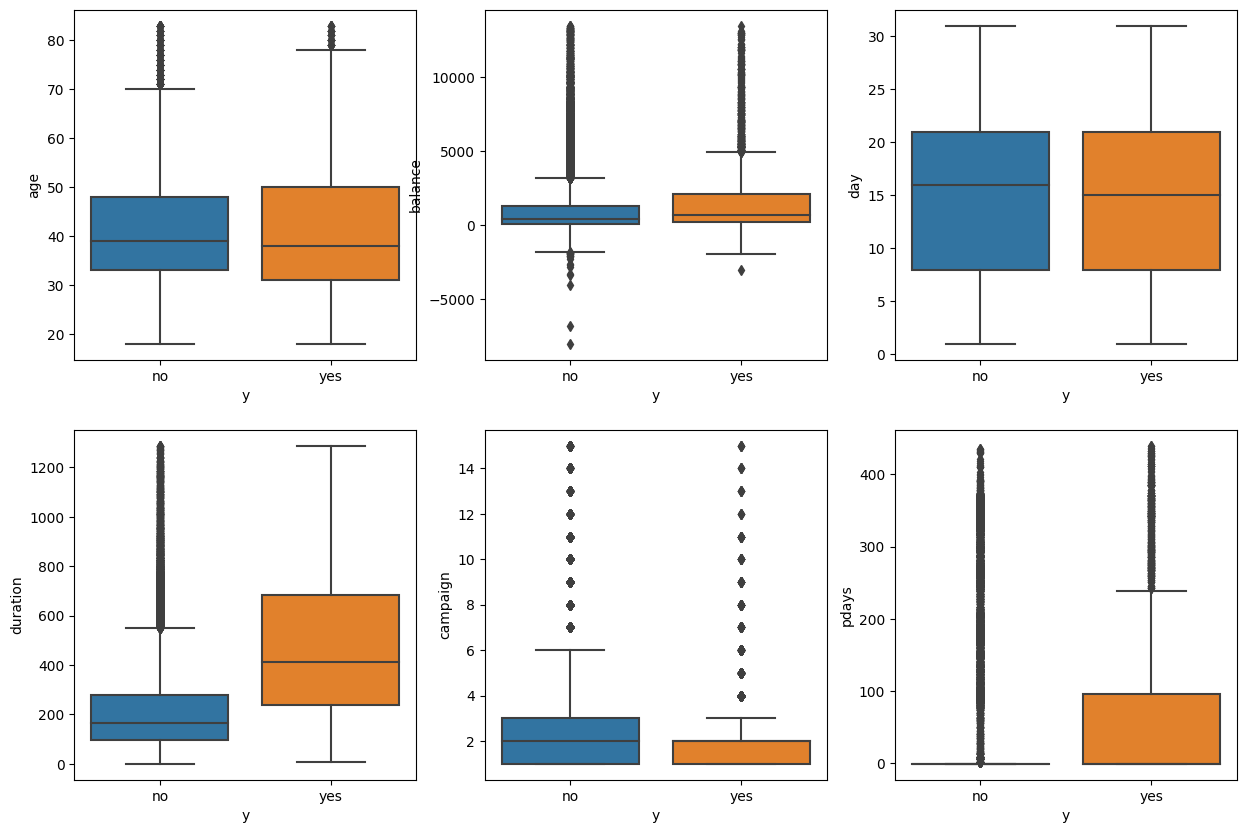

In [1634]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
sns.boxplot(y='age', x='y', data=df,ax=axs[0][0])
sns.boxplot(y='balance', x='y', data=df, ax=axs[0][1])
sns.boxplot(y='day', x='y', data=df, ax=axs[0][2])
sns.boxplot(y='duration', x='y', data=df, ax=axs[1][0])
sns.boxplot(y='campaign', x='y', data=df, ax=axs[1][1])
sns.boxplot(y='pdays', x='y', data=df, ax=axs[1][2])


Intial hypothesis Age, Balance and duration can be strong predictor of Target variable

In [1635]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [1636]:
mapping = {'yes': 1, 'no': 0}

In [1637]:
df['y']=df['y'].map(mapping)

/var/folders/yk/m3w26_h527n36v88wgw18khc0000gn/T/ipykernel_98772/3381902762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y']=df['y'].map(mapping)


In [1638]:
categorical_column = ['job', 'marital', 'education', 'default', 'housing', 'loan']

In [1639]:
df.groupby(['job', 'y'])['age'].count().unstack()

y,0,1
job,,
admin.,4423,575
blue-collar,8800,637
entrepreneur,1324,112
housemaid,1109,104
management,7810,1193
retired,1683,469
self-employed,1342,168
services,3717,332
student,650,256


In [1640]:
df.groupby(['marital', 'y'])['age'].count().unstack()

y,0,1
marital,,
divorced,4437,554
married,23570,2496
single,10481,1739


In [1641]:
df.groupby(['education', 'y'])['age'].count().unstack()

y,0,1
education,,
primary,6306,557
secondary,20980,2333
tertiary,11202,1899


In [1642]:
df.groupby(['default', 'y'])['age'].count().unstack()

y,0,1
default,,
no,37752,4739
yes,736,50


In [1643]:
df.groupby(['housing', 'y'])['age'].count().unstack()

y,0,1
housing,,
no,16073,3096
yes,22415,1693


In [1644]:
df.groupby(['loan', 'y'])['age'].count().unstack()

y,0,1
loan,,
no,31941,4358
yes,6547,431


In [1645]:
df[df['y']==0].describe(include='all')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,38488.000000,38488,38488,38488,38488,38488.000000,38488,38488,38488,38488.000000,38488,38488.000000,38488.000000,38488.000000,38488.000000,38488,38488.0
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,NaN
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,NaN
freq,NaN,8800,23570,20980,37752,NaN,22415,31941,30023,NaN,12557,NaN,NaN,NaN,NaN,14868,NaN
mean,40.790688,NaN,NaN,NaN,NaN,1104.679485,NaN,NaN,NaN,15.819138,NaN,216.741686,2.590002,34.260757,0.177023,NaN,0.0
std,10.110325,NaN,NaN,NaN,NaN,1895.466562,NaN,NaN,NaN,8.265384,NaN,180.493498,2.203123,91.998364,0.451301,NaN,0.0
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,0.0
25%,33.000000,NaN,NaN,NaN,NaN,56.000000,NaN,NaN,NaN,8.000000,NaN,97.000000,1.000000,-1.000000,0.000000,NaN,0.0
50%,39.000000,NaN,NaN,NaN,NaN,409.000000,NaN,NaN,NaN,16.000000,NaN,165.000000,2.000000,-1.000000,0.000000,NaN,0.0
75%,48.000000,NaN,NaN,NaN,NaN,1302.250000,NaN,NaN,NaN,21.000000,NaN,278.000000,3.000000,-1.000000,0.000000,NaN,0.0


In [1646]:
df[df['y']==1].describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4789.000000,4789,4789,4789,4789,4789.000000,4789,4789,4789,4789.000000,4789,4789.000000,4789.000000,4789.000000,4789.000000,4789,4789.0
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,NaN
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,success,NaN
freq,NaN,1193,2496,2333,4739,NaN,3096,4358,4222,NaN,841,NaN,NaN,NaN,NaN,1921,NaN
mean,41.508039,NaN,NaN,NaN,NaN,1571.081854,NaN,NaN,NaN,15.060138,NaN,483.557528,2.063688,61.892044,0.432269,NaN,1.0
std,13.339354,NaN,NaN,NaN,NaN,2200.041974,NaN,NaN,NaN,8.534082,NaN,296.785237,1.661746,102.506667,0.645796,NaN,0.0
min,18.000000,NaN,NaN,NaN,NaN,-3058.000000,NaN,NaN,NaN,1.000000,NaN,8.000000,1.000000,-1.000000,0.000000,NaN,1.0
25%,31.000000,NaN,NaN,NaN,NaN,203.000000,NaN,NaN,NaN,8.000000,NaN,237.000000,1.000000,-1.000000,0.000000,NaN,1.0
50%,38.000000,NaN,NaN,NaN,NaN,706.000000,NaN,NaN,NaN,15.000000,NaN,411.000000,2.000000,-1.000000,0.000000,NaN,1.0
75%,50.000000,NaN,NaN,NaN,NaN,2103.000000,NaN,NaN,NaN,21.000000,NaN,682.000000,2.000000,96.000000,0.693147,NaN,1.0


# Some more Preliminary insights from above: 

1- The majority of people who subscribe to the service tend to have an average age of 41, typically work in management positions, are married, and have attained at least a secondary level of education.

2- Conversely, those who did not subscribe have an average age of 40, often work in blue-collar job industries, are married, and typically hold a secondary level of education.

# Predictor for the model  

Based on our analysis, it appears that Age, Balance, Duration, Housing, and Poutcome can be a strong predictors for our model. We will proceed by incorporating these variables into our model-building process.

In [1647]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [1648]:
#Storing the relevant columns 
relevant_columns= ['age', 'balance','duration', 'housing', 'poutcome','campaign', 'pdays','previous', 'job', 'loan', 'contact','y']

#relevant_columns= ['age', 'balance','duration', 'housing', 'poutcome', 'job','marital', 'loan','education','default','y']

In [1649]:
#Putting the relevant columns in a data frame 
new_df=df[relevant_columns]

In [1650]:
new_df

,age,balance,duration,housing,poutcome,campaign,pdays,previous,job,loan,contact,y
0,58,2143,261,yes,failure,1,-1,0.000000,management,no,telephone,0
1,44,29,151,yes,failure,1,-1,0.000000,technician,no,telephone,0
2,33,2,76,yes,success,1,-1,0.000000,entrepreneur,yes,cellular,0
3,47,1506,92,yes,other,1,-1,0.000000,blue-collar,no,cellular,0
4,33,1,198,no,success,1,-1,0.000000,technician,no,cellular,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,505,386,no,other,2,-1,0.000000,technician,yes,cellular,1
45206,51,825,977,no,success,3,-1,0.000000,technician,no,cellular,1
45207,71,1729,456,no,other,2,-1,0.000000,retired,no,cellular,1
45208,72,5715,1127,no,success,5,184,1.386294,retired,no,cellular,1


In [1651]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43277 entries, 0 to 45209
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       43277 non-null  int64  
 1   balance   43277 non-null  int64  
 2   duration  43277 non-null  int64  
 3   housing   43277 non-null  object 
 4   poutcome  43277 non-null  object 
 5   campaign  43277 non-null  int64  
 6   pdays     43277 non-null  int64  
 7   previous  43277 non-null  float64
 8   job       43277 non-null  object 
 9   loan      43277 non-null  object 
 10  contact   43277 non-null  object 
 11  y         43277 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.3+ MB


# Part 2: Build Baseline Models

In [1652]:
num_columns= ['balance', 'duration', 'pdays', 'campaign', 'previous']

In [1653]:
cat_columns= ['housing', 'poutcome', 'job', 'loan', 'contact']
#'job', 'marital', 'loan','education', 'default'

In [1654]:
target = 'y'

In [1655]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV


In [1656]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [1657]:
X_train, X_test, y_train, y_test = train_test_split(new_df[cat_columns + num_columns], new_df[target], test_size=0.2, random_state=123)


In [1658]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [1659]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier



In [1660]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x_train_transformed, y_train)
from sklearn.metrics import classification_report


In [1661]:
# Train and evaluate a model
clf = RandomForestClassifier()
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(x_test_transformed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      7684
           1       0.29      0.71      0.41       972

    accuracy                           0.77      8656
   macro avg       0.62      0.74      0.63      8656
weighted avg       0.88      0.77      0.81      8656



In [1524]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43277 entries, 0 to 45209
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       43277 non-null  int64  
 1   balance   43277 non-null  int64  
 2   duration  43277 non-null  int64  
 3   housing   43277 non-null  object 
 4   poutcome  43277 non-null  object 
 5   campaign  43277 non-null  int64  
 6   pdays     43277 non-null  int64  
 7   previous  43277 non-null  float64
 8   job       43277 non-null  object 
 9   loan      43277 non-null  object 
 10  contact   43277 non-null  object 
 11  y         43277 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.3+ MB


In [1662]:
X_train_transformed.shape

(34621, 25)

In [1663]:
X_test_transformed.shape

(8656, 25)

In [1664]:
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns)

In [1665]:
encoded_columns = encoded_columns.tolist()

In [1666]:
all_feat = num_columns + encoded_columns

X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

In [1667]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve



In [1668]:
#Base models 
log = LogisticRegression()
knn = KNeighborsClassifier()

In [1669]:
log.fit(X_resampled, y_resampled)
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [1670]:
pred_l = log.predict(X_test_transformed)
pred_knn = knn.predict(X_test_transformed)

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [1671]:
print(f1_score(pred_l, y_test))
print(f1_score(pred_knn,y_test))

0.48017902813299224
0.43762781186094074


In [1672]:
print(recall_score(pred_l, y_test))
print(recall_score(pred_knn,y_test))

0.34833024118738404
0.327217125382263


In [1673]:
print(precision_score(pred_l, y_test))
print(precision_score(pred_knn,y_test))

0.772633744855967
0.6604938271604939


In [1674]:
print(accuracy_score(pred_l, y_test))
print(accuracy_score(pred_knn,y_test))

0.8121534195933456
0.8093807763401109


Select the model

# Hyperparameter tunning

In [1675]:
# Logistic 
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [50, 100, 150]
}
rs_log = RandomizedSearchCV(log, param_distributions=param_grid, cv=10)
rs_log.fit(X_resampled,y_resampled)
rs_log.best_estimator_

LogisticRegression(C=0.1, solver='liblinear')

In [1677]:
log_best = LogisticRegression(C=0.1, max_iter=150, penalty='l1',solver='liblinear')
log_best.fit(X_resampled,y_resampled)
pred_best_log = log_best.predict(x_test_transformed)
cv_scores = cross_val_score(log_best, X_resampled, y_resampled, cv=10, scoring='recall')
print("Cross-validation scores for Logistic Regression: ", cv_scores)

Cross-validation scores for Logistic Regression:  [0.78149351 0.79642857 0.78311688 0.80487013 0.80395975 0.79519636
 0.79746835 0.80623174 0.7961039  0.80454545]


In [1678]:
cv_scores.mean()

0.7969414657072884

In [1679]:
print(recall_score(pred_best_log, y_test))

0.3477251624883937


In [1680]:
knn = KNeighborsClassifier(n_neighbors = 40)
knn.fit(X_resampled, y_resampled)
y_pred = knn.predict(X_test_transformed)
print(f1_score(y_pred, y_test))
print(recall_score(y_pred, y_test))

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.464922711058264
0.3269230769230769


In [1681]:
recall = []

for a in range(1,100):
    knn = KNeighborsClassifier(n_neighbors = a)
    knn.fit(X_resampled, y_resampled)
    y_pred = knn.predict(X_test_transformed)
    # print(f1_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/User

In [1682]:
pred_knn_prob = knn_best.predict_proba(X_test_transformed)


/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


# Model Evaluation

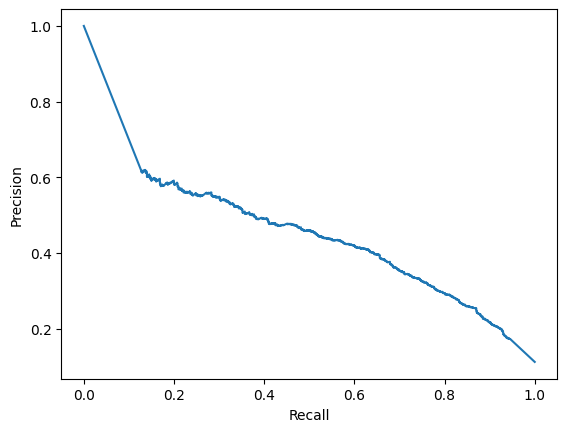

In [1683]:
precision, recall, _ = precision_recall_curve(y_test, pred_knn_prob[:, 1]) 
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [1684]:
params_knn = {'n_neighbors': list(range(1,200)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=5, n_iter = 10, scoring='recall')
randomsearch_knn.fit(X_resampled, y_resampled)
print("Best parameters for KNN - randomsearch: ", randomsearch_knn.best_params_)

Best parameters for KNN - randomsearch:  {'weights': 'distance', 'n_neighbors': 18, 'metric': 'manhattan'}


In [1685]:
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)

In [1690]:
cv_scores_knn = cross_val_score(knn_best, X_resampled, y_resampled, cv=10, scoring='recall')

In [1691]:
print("Cross-validation scores for KNN: ", cv_scores_knn)
knn_best.fit(X_resampled, y_resampled)
y_pred_knn = knn_best.predict(X_test_transformed)
print("Test accuracy for KNN: ", recall_score(y_test, y_pred_knn))

Cross-validation scores for KNN:  [0.93896104 0.95064935 0.95616883 0.96136364 0.96202532 0.95813048
 0.96105161 0.96234989 0.95941558 0.96461039]


/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Test accuracy for KNN:  0.6810699588477366


In [1694]:
print("\nK-Nearest Neighbors Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))


K-Nearest Neighbors Metrics: 
Confusion Matrix:  [[6481 1203]
 [ 310  662]]
Accuracy:  0.8252079482439926
Precision:  0.35495978552278823
Recall:  0.6810699588477366
F1 Score:  0.46669016566795907


## Part 3: Ensemble Modelling

In [1695]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier

In [1696]:
knn = KNeighborsClassifier(n_neighbors=10)
log_reg = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=20)
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)])

In [1710]:
classifiers = {
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

In [1698]:
results = {}

In [1699]:
import time
from sklearn.pipeline import Pipeline 

In [1712]:
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Fit the model
    clf.fit(X_resampled, y_resampled)
    
    # Make predictions
    y_pred = clf.predict(x_test_transformed)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.336000  0.691358  0.452221  0.811922  0.955941
Logistic Regression   0.348330  0.772634  0.480179  0.812153  1.922043
Decision Tree         0.198028  0.764403  0.314564  0.625924  0.416956
Random Forest         0.309982  0.696502  0.429024  0.791821  5.637358
AdaBoost              0.211765  0.888889  0.342043  0.615989  1.512911
Bagging               0.245661  0.757202  0.370968  0.711645  1.741031
Voting                0.342330  0.782922  0.476369  0.806724  1.241778


In [1719]:
dt_params = {'max_depth': [10,20,30,40,50]}
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30, 50]}
ada_params = {'n_estimators': [25, 50, 75]}
bag_params = {'n_estimators': [5, 10, 20]}
voting_params = {'voting': ['hard', 'soft']}

In [1720]:
params_dict = {
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

# Initialize results dictionary for tuned models
tuned_results = {}

# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create GridSearchCV object
    grid = GridSearchCV(estimator=clf, param_grid=params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_resampled, y_resampled)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test_transformed)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df);

                                            Best Params Precision    Recall   
Decision Tree                         {'max_depth': 20}  0.196452  0.763374  \
Random Forest  {'max_depth': None, 'n_estimators': 150}   0.31036  0.708848   
AdaBoost                           {'n_estimators': 75}  0.195982  0.903292   
Bagging                            {'n_estimators': 20}  0.243423  0.790123   

               F1-Score    Time (s)  
Decision Tree  0.312487    5.397835  
Random Forest  0.431704  268.134327  
AdaBoost       0.322084   20.738864  
Bagging        0.372183   28.769702  


# Part 4: Performance Comparison
Compare the performance of all models (including the baseline models). Consider both the time required for the models to run, and the performance of the models on the data set.

# Preproccesing Approach:
- The dataset we received contained a significant number of missing or unknown values. Initially, we handled this by marking those values as "NaN" (which stands for "Not a Number"), and then we explored three different approaches to replace these missing values. After carefully evaluating all three methods and choosing the one that best preserved the integrity of the data, we proceeded with that selected option. And we initiated the data cleaning phase, during which we identified and removed outliers from the dataset. Following the outlier removal, we proceeded to conduct Exploratory Data Analysis (EDA) to delve deeper into the data and gain a better understanding of its characteristics.



# Imbalance Data 

- The dataset we received exhibited a significant imbalance, especially in the target variable 'y,' where one outcome was much more frequent than the other. To address this issue and ensure that we had a more balanced dataset, we applied the SMOTE (Synthetic Minority Over-sampling Technique) method. SMOTE helps create synthetic data points for the underrepresented class, thereby balancing the dataset and improving the model's ability to learn from both outcomes more effectively.


# Interpretation & Model comparison: 

- Given that our business challenge doesn't involve critical, life-threatening scenarios, there exists some latitude to tolerate false positive outcomes in order to avoid overlooking potential customers. Consequently, our modeling approach prioritizes optimizing the recall metric to effectively address this specific context.


- The K-nearest neighbors (KNN) model initially showed poor performance with a recall rate below 35%. However, after hyperparameter tuning, we significantly improved the recall rate to 68%, and the model didn't take too much time to run. It's important to note that while the model exhibited high accuracy, the F1-score, which considers both precision and recall, did not meet our expectations.

- The Logistics Regression model (Base line) initially exhibited better accuracy, recall, and F1 score. However, after hyperparameter tuning, the model did not demonstrate any improvement and, in fact, either remained unchanged or even saw a decrease in performance. It's worth noting that this model is one of the fastest in terms of execution speed.

- The Decision Tree with the max_depth parameter set to 20 performed the fastest among all models and had an overall decent performance with a precision of approximately 0.196 and a recall of approximately 0.763. Its F1-score was around 0.312, and it took approximately 5.4 seconds to run.

- The Random Forest model is the most inefficient model of all and has taken the most time compared to other models to run. It has very low performance metrics with a precision of approximately 0.310 and a recall of approximately 0.709. Its F1-score was around 0.432, but it took a significant amount of time, approximately 268 seconds, to execute due to the large number of estimators and lack of max depth constraint.

- The AdaBoost has very high recall, approximately 0.903, and takes almost 1/6 of the time of the Random Forest model, with an execution time of around 20.7 seconds. However, its precision is relatively low, at approximately 0.196, and the F1-score is around 0.322.

- The Bagging model, with a configuration of {'n_estimators': 20}, displayed a balanced performance across various metrics. It achieved a precision of approximately 0.243 and a recall of about 0.790. The F1-score for this model was approximately 0.372. In terms of execution time, it took approximately 28.8 seconds to run, making it more time-efficient than models like Random Forest. This model offers a good compromise between precision and recall, making it a suitable choice when looking for a balanced trade-off between accuracy and efficiency.


In summary, the Decision Tree model performed well in terms of both speed and performance. Random Forest was accurate but time-consuming. AdaBoost excelled in recall but lacked precision. Bagging struck a balance between precision and recall while being reasonably efficient. The choice should align with project priorities


# Part 5: Interpretation and Justification

# 1: Why did the ensemble models perform the way they did?

- The performance of our model did not meet our initial expectations. We had anticipated that these models, leveraging ensemble methods known for enhancing overall performance, would outperform their actual performance results. However, it became evident that the ensemble methods failed to enhance the overall performance of our models as anticipated.


# 2: If you had to pick one model to implement in business process, which would it be and why?

- From a business perspective and in larger organizations where computing costs are a significant concern, the choice of model becomes even more critical. In such environments, efficiency and cost-effectiveness are paramount. In this context:

- The Decision Tree model stands out and we would be choosing this as it offers decent performance while being relatively faster and more cost-effective to run compared to other models.

- Random Forest, with its extensive computational demands, may not be the best choice due to its higher computing costs.

- AdaBoost, despite its high recall, may be expensive to implement due to its longer execution time.

- Bagging provides a balanced trade-off between performance and efficiency, making it a more cost-effective option in terms of both time and computing resources.

- Ultimately, for larger organizations with constrained computing budgets, selecting a model like Decision Tree could be a prudent decision, ensuring that resources are allocated efficiently without compromising on model effectiveness. Hence keeing all this in mind we will chose to go with Decision tree model.

# 3: What decision criteria did you use to arrive at this conclusion?

In our evaluation of the models, we considered several additional factors:

- Precision-Recall Trade-off: We examined how the models balanced precision (the accuracy of positive predictions) and recall (the ability to identify all relevant instances). Finding the right trade-off between these two metrics is essential, especially in situations where one is more critical than the other.

- Computational Cost: We took into account the computational resources required to train and deploy the models. Some ensemble methods can be computationally intensive, and we assessed whether the performance gains justified the associated costs.

- Interpretability: Depending on the application, we evaluated the interpretability of the models. Some ensemble methods offer insights into feature importance, making it easier to understand model decisions, while others may be more complex and less interpretable.

- Scalability: We considered whether the models could effectively handle larger datasets or increased model complexity. This scalability is crucial when dealing with expanding data volumes or more complex modeling requirements.

- Robustness: We assessed how well the models performed under various conditions, including noisy data or shifts in the data distribution. A robust model maintains reasonable performance even in challenging scenarios.

- Bias and Fairness: In scenarios where fairness and bias are concerns, we examined whether the models introduced or mitigated biases in predictions. We used metrics and techniques to ensure fairness in our model's outputs.

- These considerations provided a comprehensive assessment of the ensemble methods' performance and suitability for our specific data science tasks, aligning with our objectives and constraints.